In [58]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [60]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [61]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [62]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']]
)

In [63]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(market_data_scaled, columns = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_scaled = df_market_scaled.set_index("coin_id")

# Display sample data
df_market_scaled.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570
iota,0.259097,0.249508,-0.478953,-0.218997,-0.735815,-0.329179,-0.285310
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625
cdai,0.180851,-0.704931,-0.001816,-0.143237,0.016060,-0.551146,-0.282310
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747
dash,-0.296940,0.094763,0.040040,-0.358830,-0.558527,-0.535732,-0.284071
eos,0.155710,-0.922491,0.115024,-0.237488,-0.642837,-0.508220,-0.296330


---

### Find the Best Value for k Using the Original Data.

In [64]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [65]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_scaled)
    inertia.append(model.inertia_)

C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [66]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: xlabel='k'>

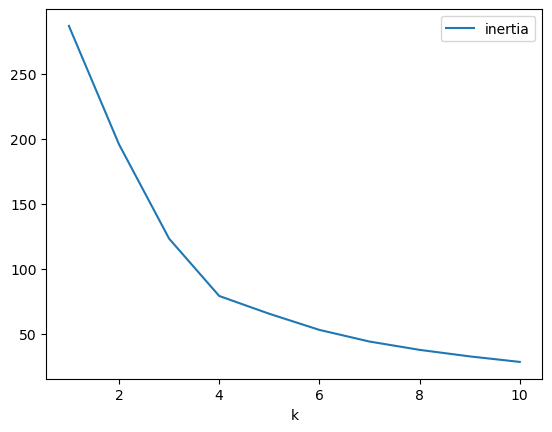

In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k", "inertia")

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [68]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [69]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [70]:
# Predict the clusters to group the cryptocurrencies using the scaled data
df_market_scaled_pred_df = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
k3_pred = df_market_scaled_pred_df

In [71]:
# Create a copy of the DataFrame
market_k3_df = df_market_scaled.copy()

In [72]:
# Add a new column to the DataFrame with the predicted clusters
market_k3_df['k3_seg'] = k3_pred

# Display sample data
market_k3_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k3_seg
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [73]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

scatter = market_k3_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="k3_seg",
    cmap='viridis',
    hover_cols=["crypto_name"],
    title="Crypto Price Change",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)"
)
scatter

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,k3_seg)

---

### Optimize Clusters with Principal Component Analysis.

In [74]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [75]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca = pca.fit_transform(df_market_scaled)

# View the first five rows of the DataFrame. 
market_pca[0:5, ]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [76]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.88442851

In [77]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_pca, columns = ['PC1', 'PC2', 'PC3'])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_market_pca["coin_id"] = df_market_scaled.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("coin_id")

# Display sample data
df_market_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [78]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [79]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_pca)
    inertia.append(model.inertia_)

C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [80]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

<Axes: xlabel='k'>

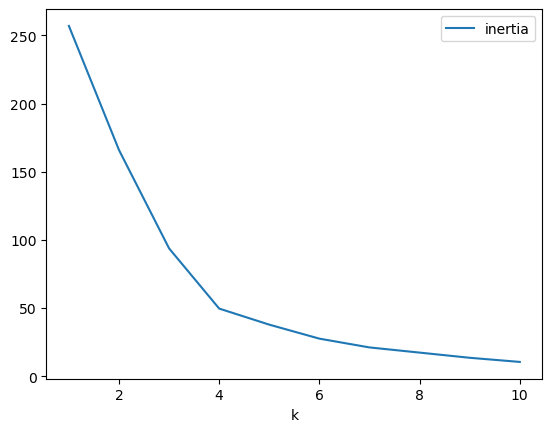

In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot("k", "inertia")

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No it doesn't differ in either cases.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [82]:
# Initialize the K-Means model using the best value for k
k3s = KMeans(n_clusters = 4)

In [83]:
# Fit the K-Means model using the PCA data
k3s.fit(df_market_pca)

C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jolto\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [84]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k3s_predict = k3s.predict(df_market_pca)
# Print the resulting array of cluster values.
crypto_clusters = k3s_predict
crypto_clusters

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 0, 1, 1, 1, 1])

In [85]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_predictions = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_predictions["CryptoCluster"] = crypto_clusters

# Display sample data
df_market_pca_predictions.sample(15)

,PC1,PC2,PC3,CryptoCluster
coin_id,,,,
digibyte,-0.297910,-0.191126,-0.909602,1
zcash,-0.425147,0.492976,1.058048,2
ethereum-classic,-0.579924,-0.356334,-0.114942,1
leo-token,-0.413296,-0.674115,-1.076628,1
theta-token,2.676868,-0.013954,-1.965207,1
maker,-0.389045,0.165041,0.379414,2
ftx-token,-0.593142,0.021485,0.209911,1
celsius-degree-token,4.792395,6.767679,-1.986985,0
binancecoin,-0.516534,1.388377,0.804071,2


In [86]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

scatter = df_market_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="CryptoCluster",
    cmap='viridis',
    hover_cols=["crypto_name"],
    title="Crypto Price Change"
)
scatter

:Scatter   [PC1]   (PC2,CryptoCluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

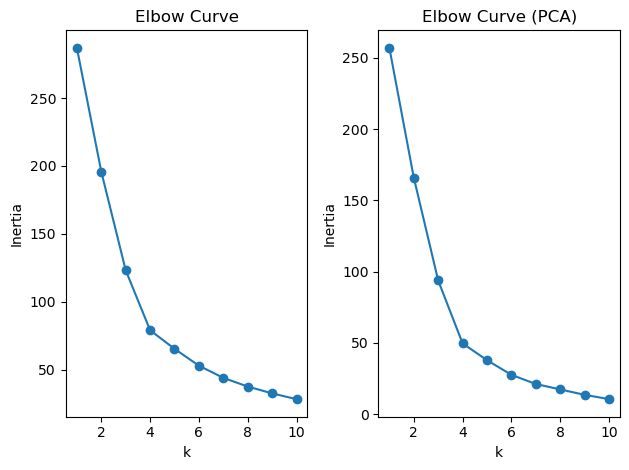

In [87]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

# Plotting the elbow curve for df_elbow
plt.subplot(1, 2, 1)  # Create a subplot for the first elbow curve
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Curve")

# Plotting the elbow curve for df_elbow_pca
plt.subplot(1, 2, 2)  # Create a subplot for the second elbow curve
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Curve (PCA)")

# Adjust the layout of the subplots for better spacing
plt.tight_layout()

# Display the composite plot
plt.show()

In [88]:
# Composite plot to contrast the clusters
import panel as pn

# Create the first scatter plot for market_k3_df
scatter1 = market_k3_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="k3_seg",
    cmap='viridis',
    hover_cols=["crypto_name"],
    title="Crypto Price Change",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)"
)

# Create the second scatter plot for df_market_pca_predictions
scatter2 = df_market_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="CryptoCluster",
    cmap='viridis',
    hover_cols=["crypto_name"],
    title="Crypto Price Change"
)

# Combine the scatter plots into a composite plot using panel
composite_plot = pn.Column(scatter1, scatter2)

# Display the composite plot
composite_plot.show()

Launching server at http://localhost:58641


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: After reducing the number of features, the K-Means algorithm gave us visually clearer clusters.